In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import scipy.stats as stats

## Exploratory Data Analysis

Predictive Modeling Discussion For my project, I am working on a regression problem.

My goal is to predict track_popularity, which is a continuous variable. The input variables I plan to use in my model include numerical audio features that describe a song's characteristics. These features are:

- Genre
- danceability
- energy
- key
- loudness
- mode
- speechiness
- acousticness
- instrumentalness
- liveness
- valence
- tempo
- duration_ms
- My response (output/target) variable will be track_popularity (for regression).


In [3]:
# Load the data
songs_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv'

df = pd.read_csv( songs_url )

In [4]:
df.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ... key  loudness  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   6    -2.634   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...  11    -4.969   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -3.432   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   7    -3.778   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -4.672   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0583        0.1020          0.000000    0.0653    0.518   
1     1       0.0373        0.0724          0.004210    0.3570    0.693   
2     0       0.0742        0.0794          0.000023    0.1100    0.613   
3     1       0.1020        0.0287          0.000009    0.2040    0.277   
4     1       0.0359        0.0803          0.000000    0.0833    0.725   

     tempo  duration_ms  
0  122.036       194754  
1   99.972       162600  
2  124.008       176616  
3  121.956       169093  
4  123.976       189052  

[5 rows x 23 columns]

In [3]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [4]:
# Check for missing values
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [5]:
# Display unique value counts per column
df.nunique()

track_id                    28356
track_name                  23449
track_artist                10692
track_popularity              101
track_album_id              22545
track_album_name            19743
track_album_release_date     4530
playlist_name                 449
playlist_id                   471
playlist_genre                  6
playlist_subgenre              24
danceability                  822
energy                        952
key                            12
loudness                    10222
mode                            2
speechiness                  1270
acousticness                 3731
instrumentalness             4729
liveness                     1624
valence                      1362
tempo                       17684
duration_ms                 19785
dtype: int64

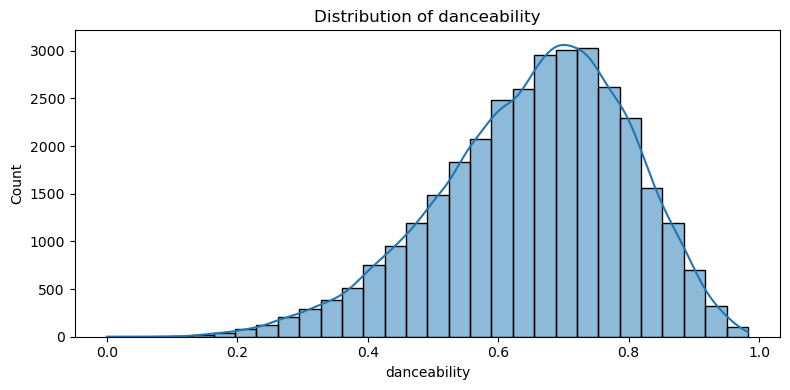

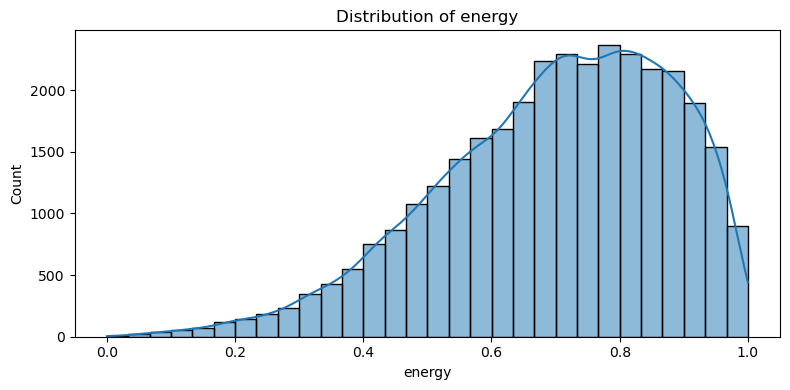

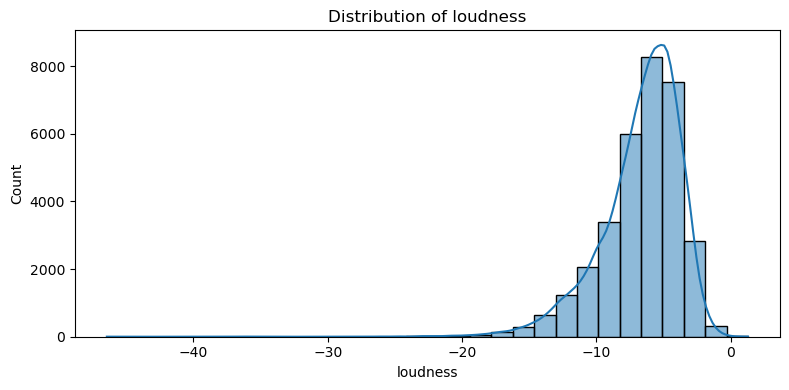

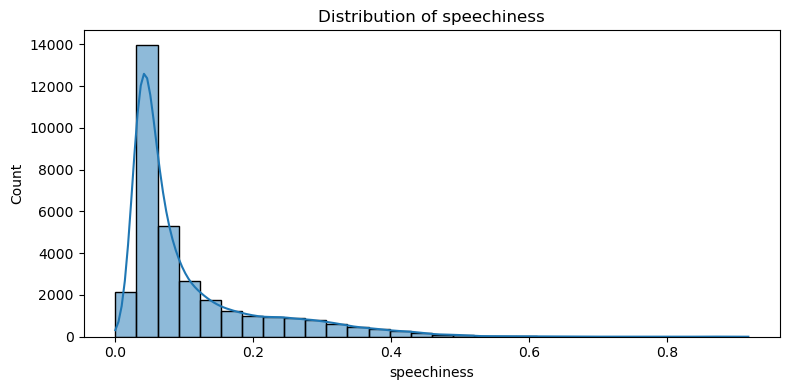

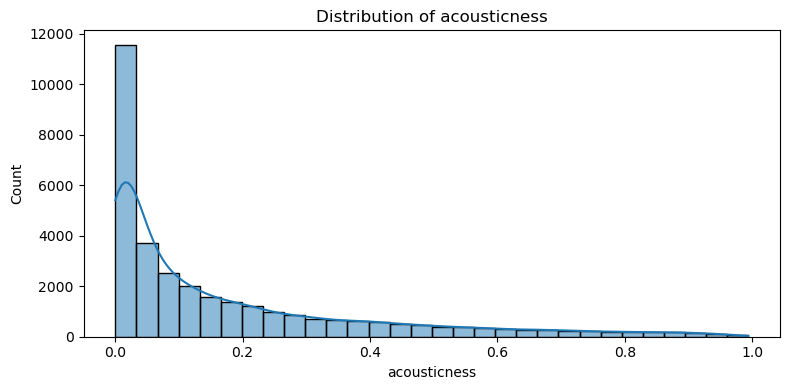

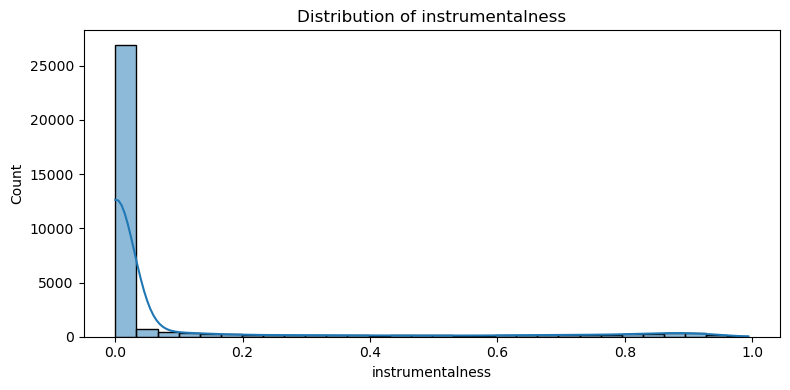

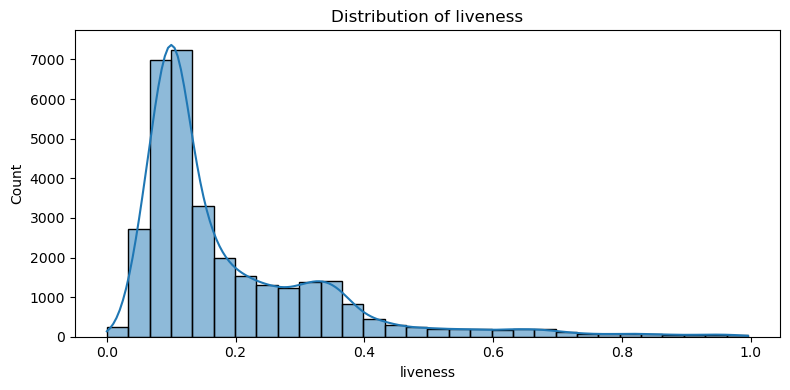

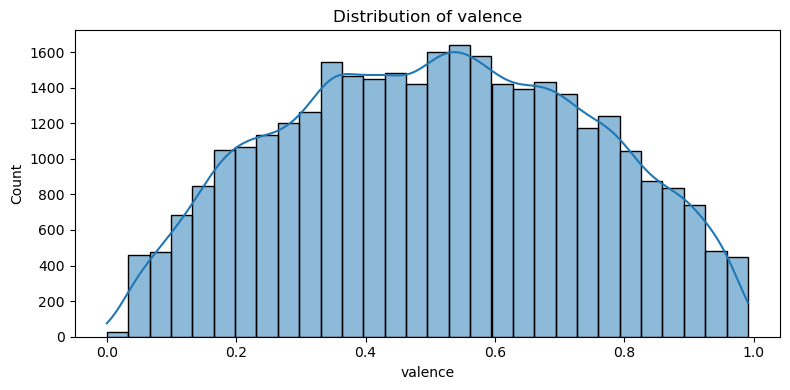

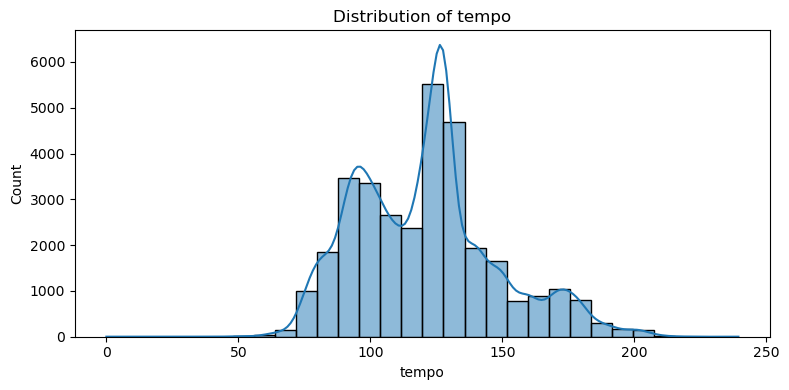

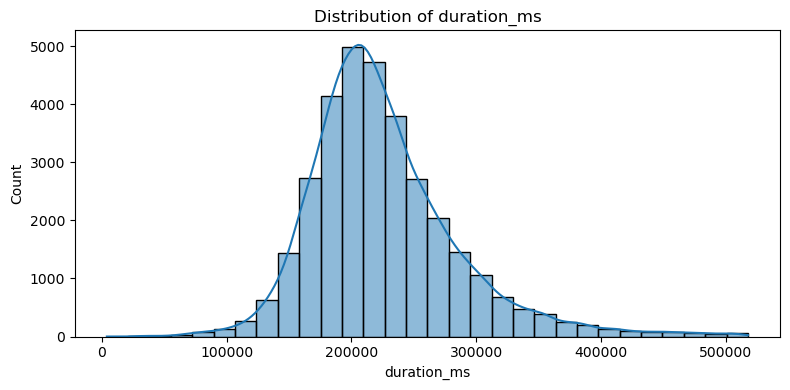

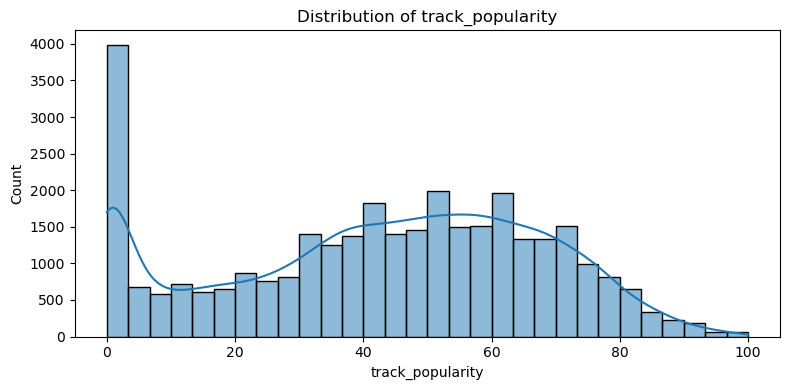

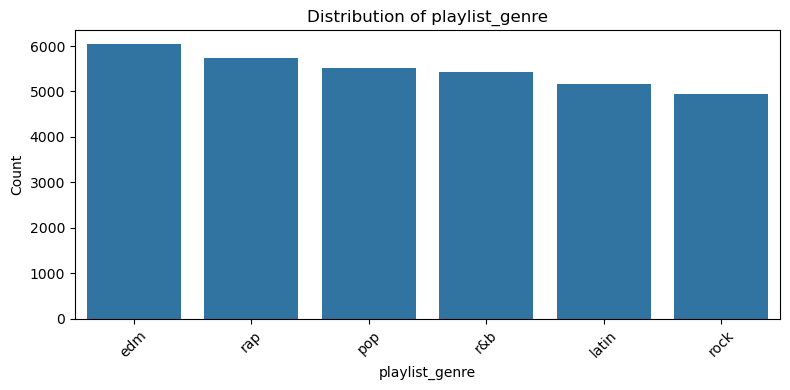

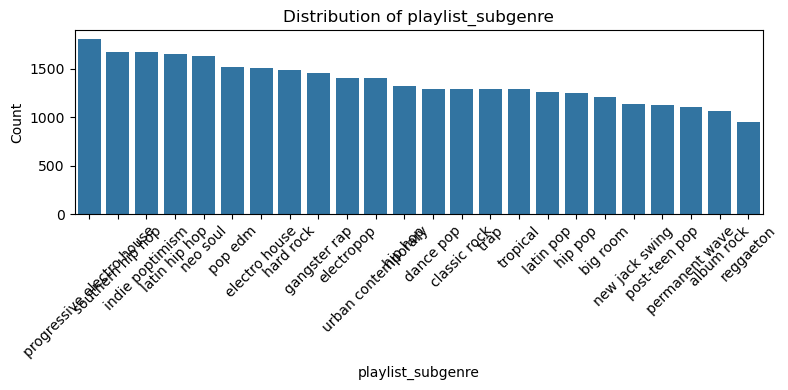

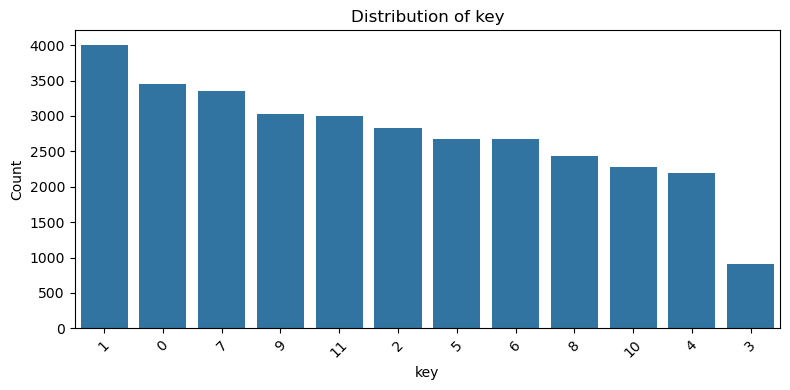

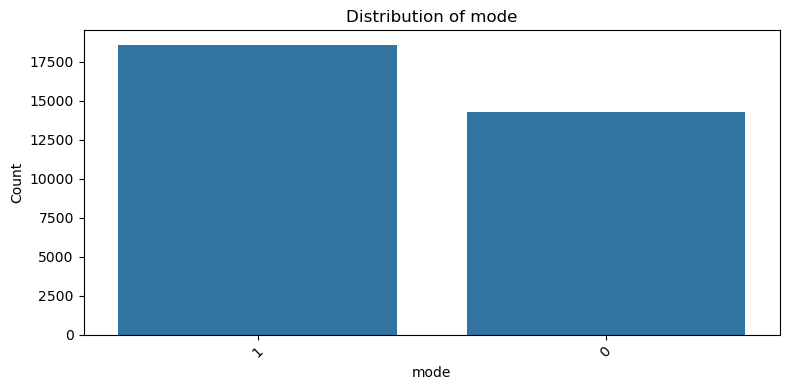

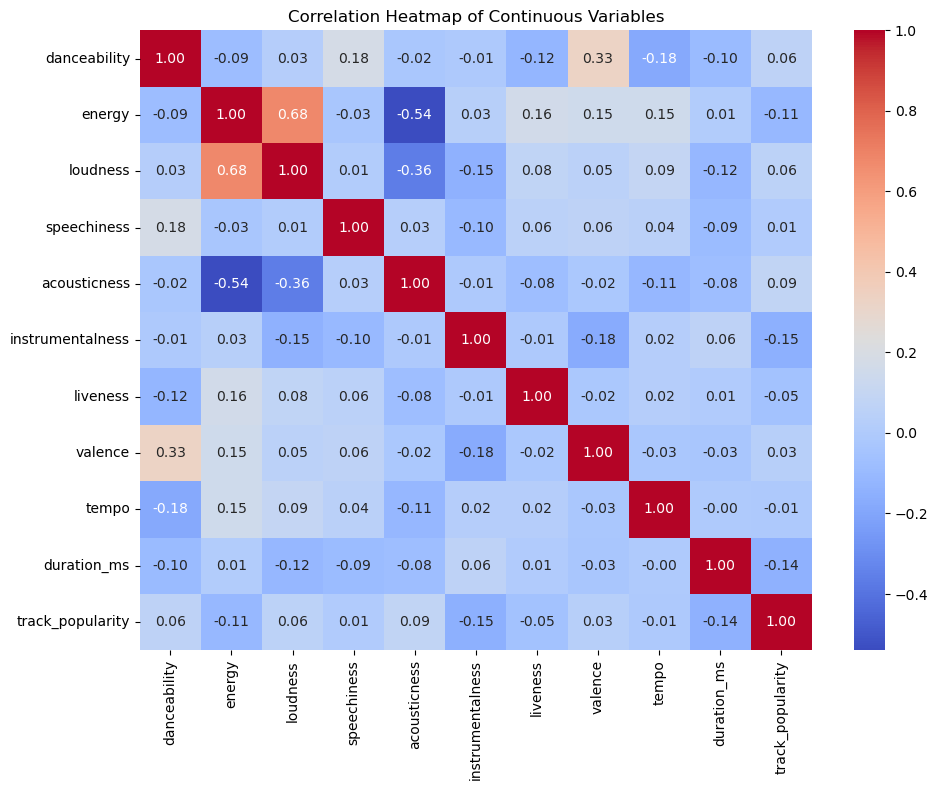

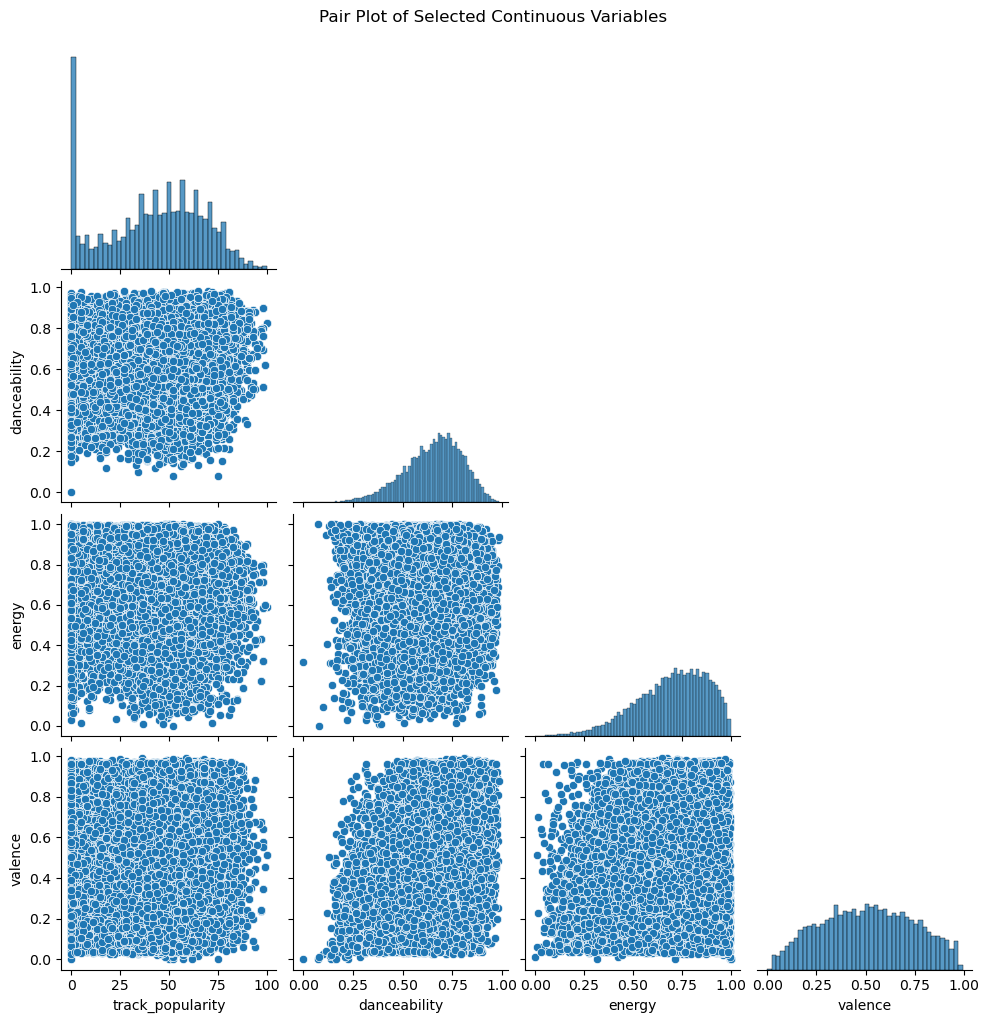

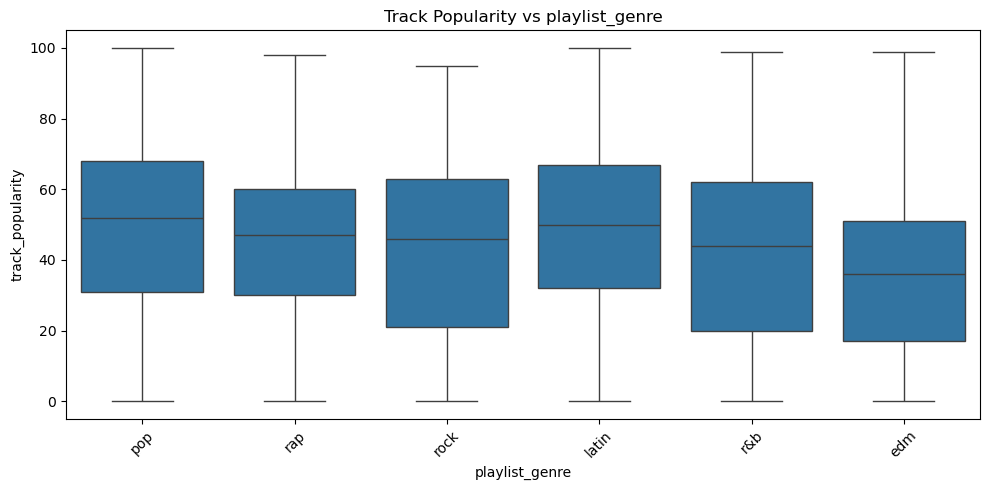

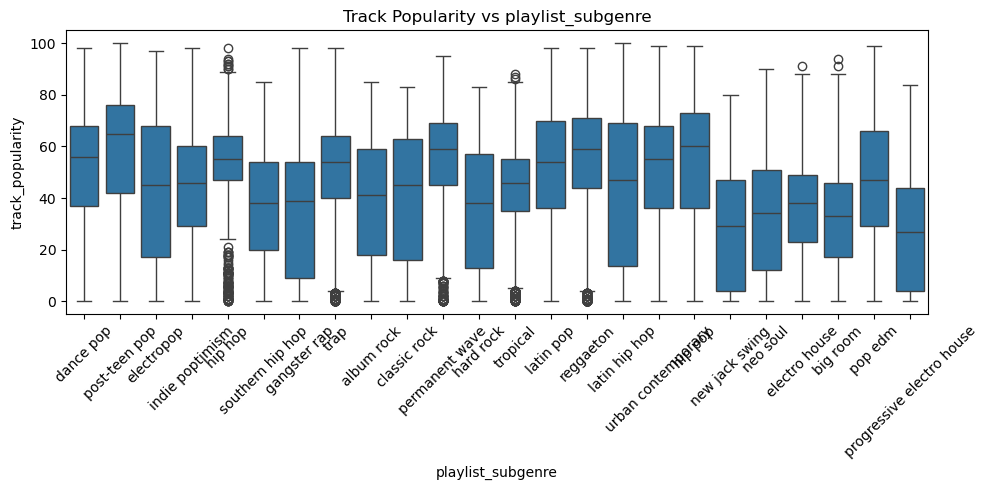

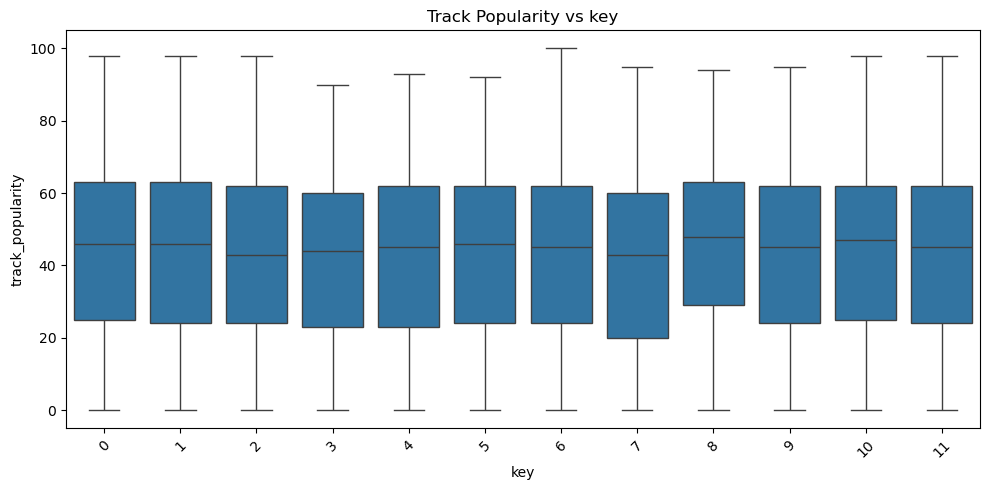

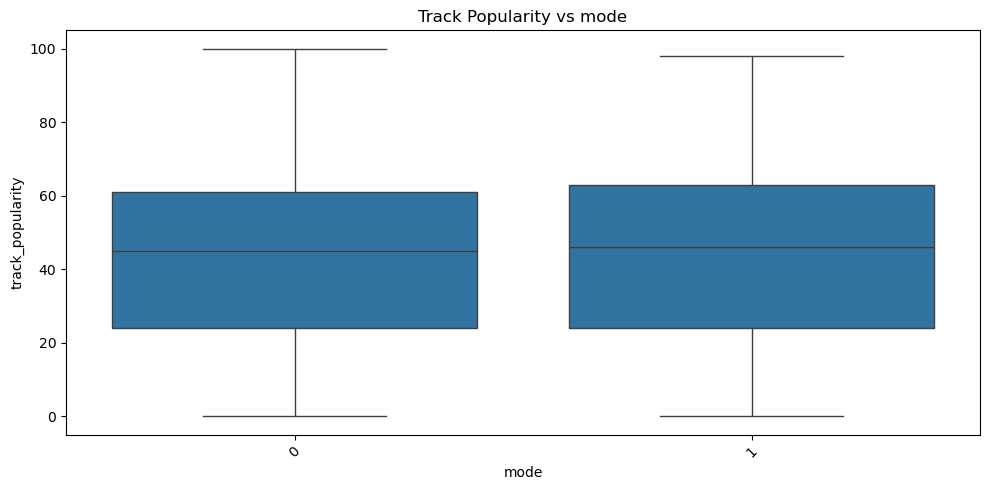

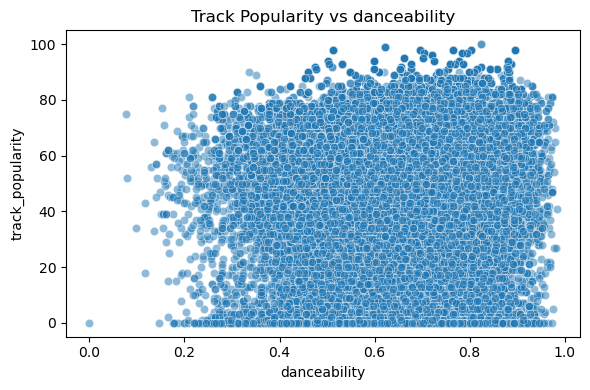

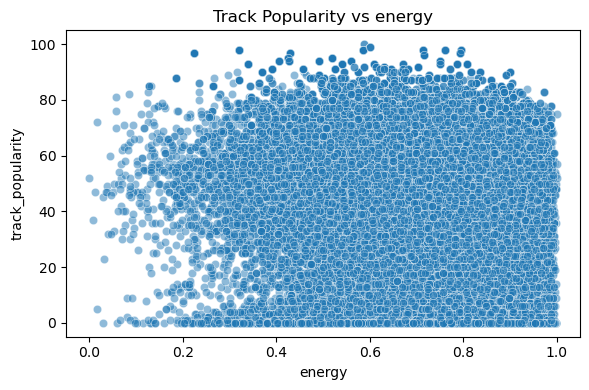

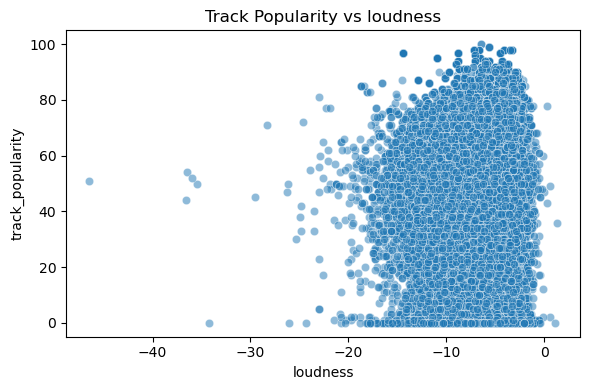

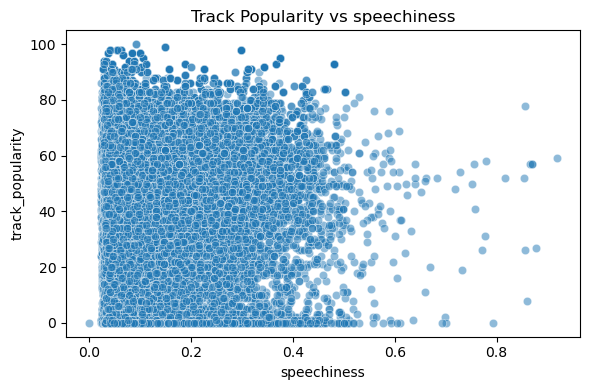

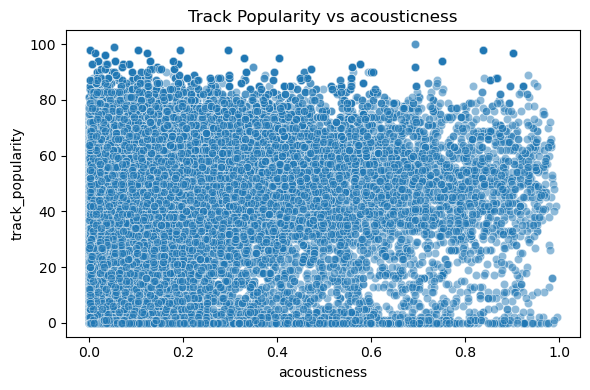

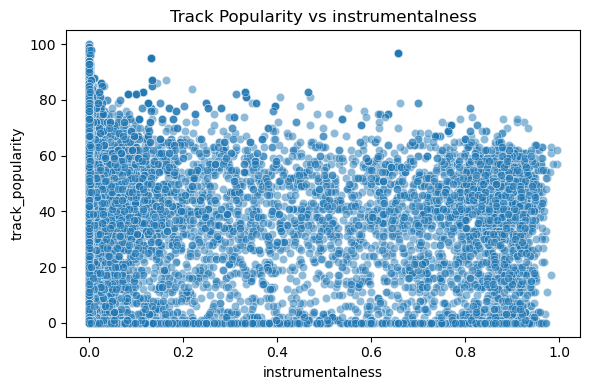

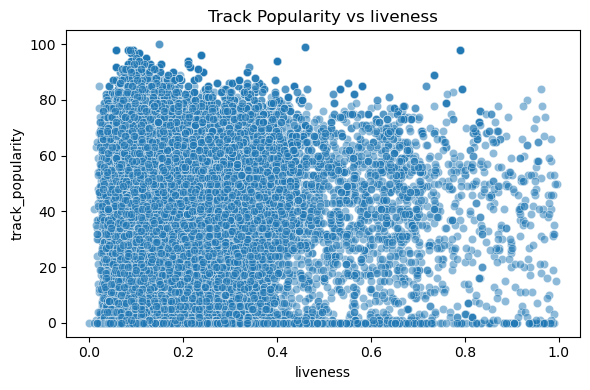

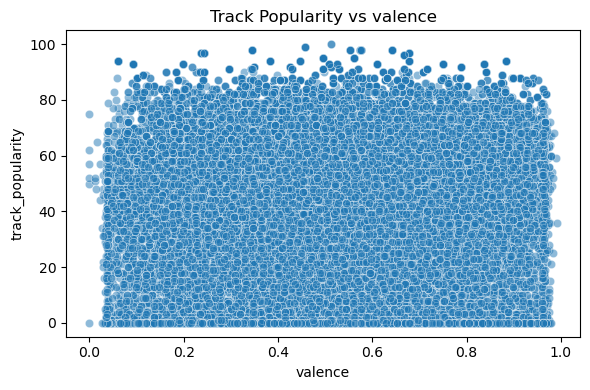

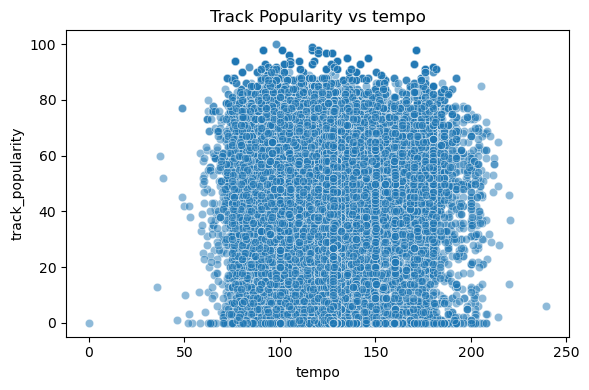

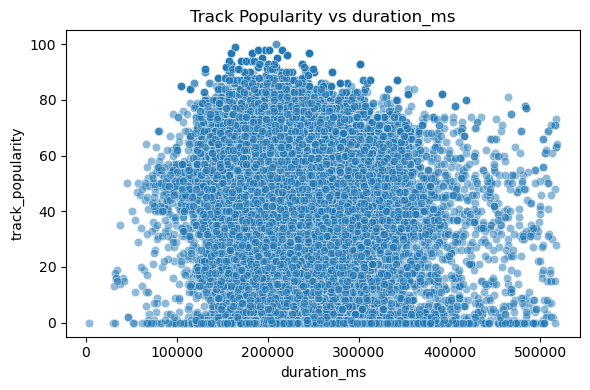

In [6]:
categorical_columns = ['playlist_genre', 'playlist_subgenre', 'key', 'mode']
continuous_columns = [
    'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'track_popularity'
]

# Plot histograms for continuous variables
for col in continuous_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# Plot bar charts for categorical variables
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# Correlation heatmap of continuous variables
plt.figure(figsize=(10, 8))
correlation_matrix = df[continuous_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Continuous Variables")
plt.tight_layout()
plt.show()

# Pair plot for selected continuous variables
selected_continuous = ['track_popularity', 'danceability', 'energy', 'valence']
sns.pairplot(df[selected_continuous], corner=True, kind='scatter')
plt.suptitle("Pair Plot of Selected Continuous Variables", y=1.02)
plt.show()

# Boxplots: response (popularity) vs categorical inputs
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=col, y='track_popularity')
    plt.xticks(rotation=45)
    plt.title(f"Track Popularity vs {col}")
    plt.tight_layout()
    plt.show()

# Scatter plots between response and continuous inputs
for col in [c for c in continuous_columns if c != 'track_popularity']:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=col, y='track_popularity', alpha=0.5)
    plt.title(f"Track Popularity vs {col}")
    plt.tight_layout()
    plt.show()

1. Distributions of Continuous Variables
Most variables like danceability, energy, valence are right-skewed but bounded between 0–1.

Loudness is negatively centered, as expected for decibel measures.

Track_popularity shows a bimodal-like structure—potentially important for classification.

2. Categorical Variable Distributions
playlist_genre and playlist_subgenre have uneven category distributions.

key and mode are more balanced but still skewed to certain classes (e.g., mode=1 is dominant).

3. Correlation Heatmap
Strong positive correlation: energy & loudness

Moderate relationship: valence & danceability

track_popularity has weak linear correlations with other variables, suggesting non-linear or interaction effects may be important.

4. Pair Plot
Shows clusters or bands in popularity vs. energy/valence.

Some non-linear relationships hint at the value of interaction or polynomial terms.

5. Boxplots (Popularity vs Categorical Variables)
Popularity distributions vary across playlist_genre and mode.

Highlights potential value of including categorical predictors in modeling.

6. Scatter Plots (Popularity vs Continuous Inputs)
Popularity vs. energy and valence suggest mild trends.

High variance in all plots shows low direct predictability without transformations or interaction terms.



In [7]:
# applying log transformation to highly skewed variables 

df_transformed = df.copy()
log_transform_cols = ['speechiness', 'acousticness', 'instrumentalness', 'liveness', 'duration_ms']

for col in log_transform_cols:
    df_transformed[f'log_{col}'] = np.log1p(df_transformed[col])

# Reflect loudness before log because it's negatively skewed
df_transformed['log_loudness'] = np.log1p(df_transformed['loudness'].max() - df_transformed['loudness'])

transformed_continuous_columns = [
    'danceability', 'energy', 'valence', 'tempo', 'track_popularity',
    'log_speechiness', 'log_acousticness', 'log_instrumentalness',
    'log_liveness', 'log_duration_ms', 'log_loudness'
]

transformed_skewness = df_transformed[transformed_continuous_columns].skew().sort_values(ascending=False)
transformed_skewness_df = transformed_skewness.to_frame(name="Skewness After Transformation")

transformed_skewness_df

Skewness After Transformation
log_instrumentalness                       2.607610
log_speechiness                            1.718722
log_liveness                               1.664489
log_acousticness                           1.296797
tempo                                      0.528878
log_loudness                               0.144975
valence                                   -0.005485
track_popularity                          -0.233320
log_duration_ms                           -0.284612
danceability                              -0.504488
energy                                    -0.636330

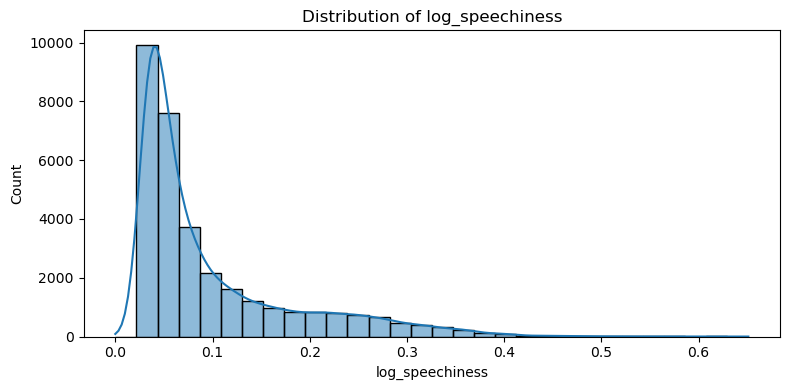

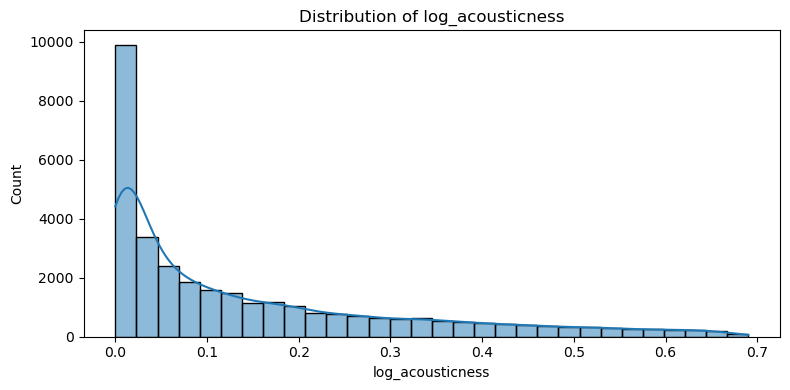

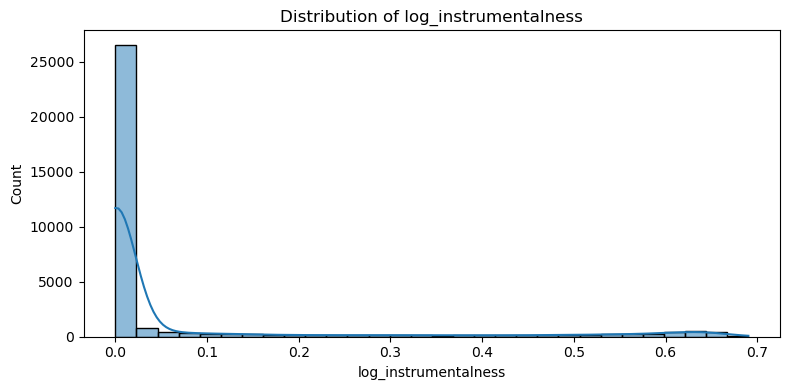

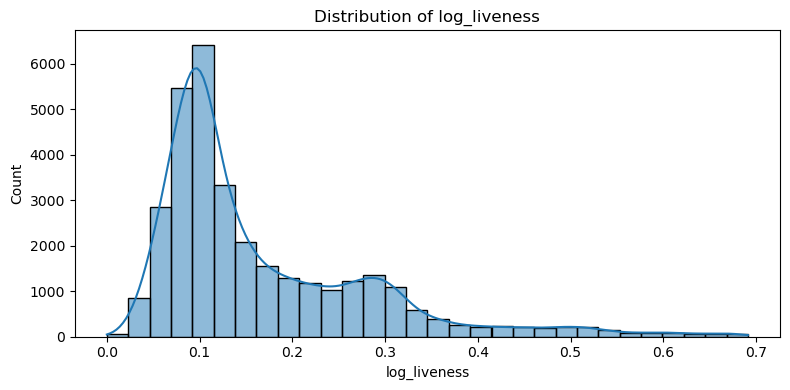

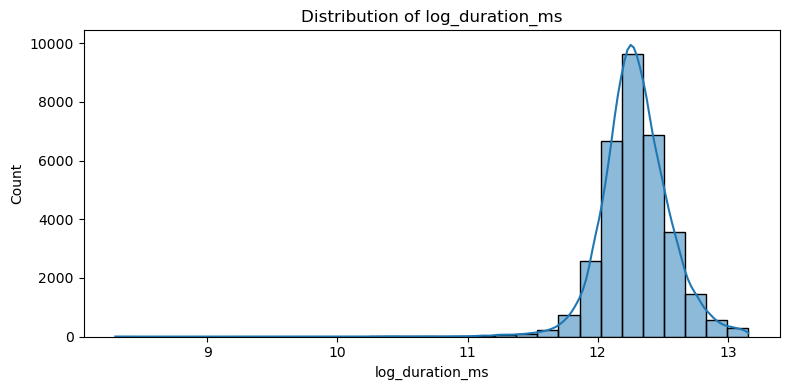

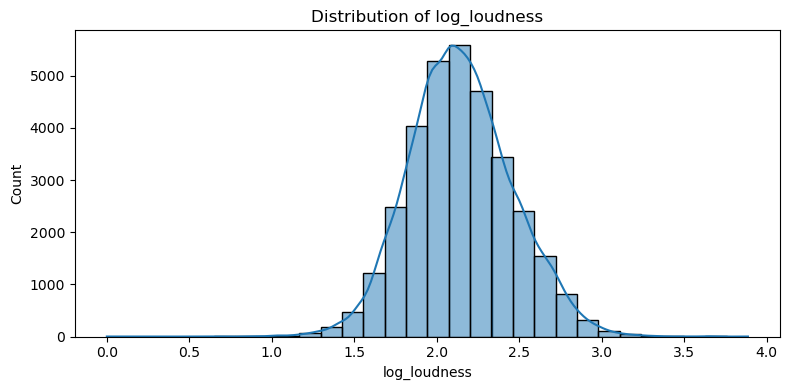

In [8]:
# Plot histograms of the transformed variables
transformed_columns_to_plot = [
    'log_speechiness', 'log_acousticness', 'log_instrumentalness',
    'log_liveness', 'log_duration_ms', 'log_loudness'
]

for col in transformed_columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_transformed[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

Distributions are more symmetric and less skewed than the original versions.

Log transformations helped compress long tails (e.g., instrumentalness, speechiness).

log_loudness is now close to a normal distribution, correcting its original left skew.

In [9]:
relevant_columns = [
    'track_popularity', 'playlist_genre', 'playlist_subgenre', 'key', 'mode',
    'danceability', 'energy', 'valence', 'tempo',
    'log_speechiness', 'log_acousticness', 'log_instrumentalness',
    'log_liveness', 'log_duration_ms', 'log_loudness'
]

df_final = df_transformed[relevant_columns]

df_final.shape, df_final.head()

((32833, 15),
    track_popularity playlist_genre playlist_subgenre  key  mode  danceability  \
 0                66            pop         dance pop    6     1         0.748   
 1                67            pop         dance pop   11     1         0.726   
 2                70            pop         dance pop    1     0         0.675   
 3                60            pop         dance pop    7     1         0.718   
 4                69            pop         dance pop    1     1         0.650   
 
    energy  valence    tempo  log_speechiness  log_acousticness  \
 0   0.916    0.518  122.036         0.056664          0.097127   
 1   0.815    0.693   99.972         0.036621          0.069899   
 2   0.931    0.613  124.008         0.071576          0.076405   
 3   0.930    0.277  121.956         0.097127          0.028296   
 4   0.833    0.725  123.976         0.035271          0.077239   
 
    log_instrumentalness  log_liveness  log_duration_ms  log_loudness  
 0              